In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [14]:
df = pd.read_csv('wuf20-91_M_8366.csv', index_col=0)
df.head()

,best_gene_fitness,best_gene_not_fulfilled,best_gene_weight,avg_fitness,median_fitness,std_fitness,avg_not_fulfilled,avg_weight,valid_count,generation,it,category,dataset_name,dataset_file,time,config_population_size,config_initial_mutation_rate,config_mutation_scaler,config_generations,config_elites_cnt
0,35896.2,4,2063,9644.399994,8368.548128,4916.214143,11.263333,1335.303333,0,0,0,M,wuf20-91,wuf20-01.mwcnf,5.697177,300,0.05,1,60,0
1,30502.2,4,1753,10255.562768,8998.890110,5255.796536,11.130000,1384.276667,0,1,0,M,wuf20-91,wuf20-01.mwcnf,5.697177,300,0.05,1,60,0
2,47938.0,3,2179,10299.355853,9080.000000,5784.455366,11.353333,1409.846667,0,2,0,M,wuf20-91,wuf20-01.mwcnf,5.697177,300,0.05,1,60,0
3,35182.8,4,2022,9887.970111,8677.500000,5337.515414,11.353333,1368.093333,0,3,0,M,wuf20-91,wuf20-01.mwcnf,5.697177,300,0.05,1,60,0
4,41074.0,3,1867,10249.153123,9104.095238,5633.758599,11.110000,1363.660000,0,4,0,M,wuf20-91,wuf20-01.mwcnf,5.697177,300,0.05,1,60,0


In [9]:
df[df['it'] == 0]

,best_gene_fitness,best_gene_not_fulfilled,best_gene_weight,avg_fitness,median_fitness,std_fitness,avg_not_fulfilled,avg_weight,valid_count,generation,it,category,dataset_name,dataset_file,time,config_population_size,config_initial_mutation_rate,config_mutation_scaler,config_generations,config_elites_cnt
0,35896.200000,4,2063,9644.399994,8368.548128,4916.214143,11.263333,1335.303333,0,0,0,M,wuf20-91,wuf20-01.mwcnf,5.697177,300,0.05,1,60,0
1,30502.200000,4,1753,10255.562768,8998.890110,5255.796536,11.130000,1384.276667,0,1,0,M,wuf20-91,wuf20-01.mwcnf,5.697177,300,0.05,1,60,0
2,47938.000000,3,2179,10299.355853,9080.000000,5784.455366,11.353333,1409.846667,0,2,0,M,wuf20-91,wuf20-01.mwcnf,5.697177,300,0.05,1,60,0
3,35182.800000,4,2022,9887.970111,8677.500000,5337.515414,11.353333,1368.093333,0,3,0,M,wuf20-91,wuf20-01.mwcnf,5.697177,300,0.05,1,60,0
4,41074.000000,3,1867,10249.153123,9104.095238,5633.758599,11.110000,1363.660000,0,4,0,M,wuf20-91,wuf20-01.mwcnf,5.697177,300,0.05,1,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,178200.000000,1,3960,21997.733860,16707.449495,20246.749789,10.640000,2566.626667,0,55,0,M,wuf20-91,wuf20-0125.mwcnf,5.580124,300,0.05,1,60,0
1856,187200.000000,1,4160,20470.730042,14960.475000,20804.172964,11.106667,2460.156667,0,56,0,M,wuf20-91,wuf20-0125.mwcnf,5.580124,300,0.05,1,60,0
1857,181800.000000,1,4040,19885.227574,15521.500000,17027.139720,11.113333,2495.393333,0,57,0,M,wuf20-91,wuf20-0125.mwcnf,5.580124,300,0.05,1,60,0
1858,172800.000000,1,3840,19012.927366,15133.442857,15306.349917,11.100000,2418.446667,0,58,0,M,wuf20-91,wuf20-0125.mwcnf,5.580124,300,0.05,1,60,0


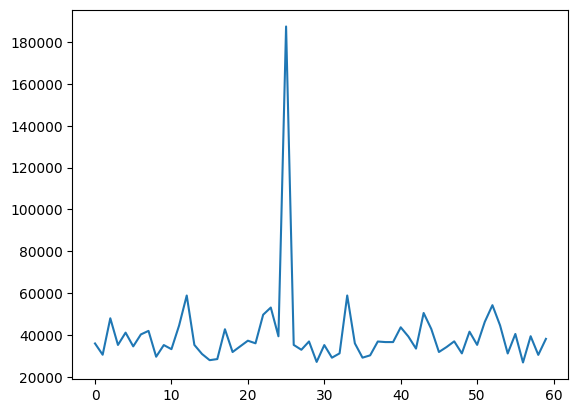

In [26]:
# it0 = df.groupby(by=['dataset_file', 'generation']).mean()
# it0
crosstab = pd.crosstab(df['dataset_file'], df['generation'], values=df['best_gene_fitness'], aggfunc='sum')

plt.plot(crosstab.iloc[0])
# plt.plot(it0['best_gene_weight'])